# The cooling_flow package

In [Stern et al. (2019a)](http://ui.adsabs.harvard.edu/abs/2019MNRAS.488.2549S) and [Stern et al. (2019b)](https://arxiv.org/abs/1909.07402) we demonstrated that the volume-filling gas phase in dark matter halos converges onto a one-parameter family of solutions, assuming ongoing heating by feedback is negligible. 
The cooling_flow package derives these solutions by integrating the spherical, steady-state flow equations for radiatively-cooling gas in a constant background potential. These solutions can thus be useful for:
* Estimating halo gas structure between feedback bursts or after feedback has died out at low redshift
* As a benchmark for estimating the effects of feedback on halo gas in observations and simulations
* Initial conditions for simulations of halo gas
* Other systems with similar conditions, such as the center of elliptical galaxies (e.g. Quataert & Narayan 2000). 

The package integrates two types of solutions -- transonic solutions with an outer subsonic flow and an inner supersonic flow, and a purely subsonic flow which stalls at the radius of rotational support (the 'circularization radius'). Details of the methodology, physical motivation and reasoning behind these integrations are described in the above papers. Please send any questions or suggestions to jonathan.stern@northwestern.edu.

_Jonathan Stern_

## A. Installation
* Download using `git clone https://jonathanstern@bitbucket.org/jonathanstern/cooling_flow.git`
* After cloning, you can interactively walk through this Python notebook (e.g. `jupyter-lab example.ipynb`)
* Required libraries: numpy, scipy, astropy

## B. Integration

In [1]:
from astropy import units as un, constants as cons
import numpy as np
import cooling_flow as CF

#### 1. define potential

In [2]:
# any class which inherits CF.Potential and implements the base class methods can be used as a potential
# several examples are implemented in the module HaloPotential
# this example initializes the potential to a power-law with v_c = 200*(r/R_vir)^-0.2
import HaloPotential as Halo
potential = Halo.PowerLaw(m=-0.1,vc_Rvir=200*un.km/un.s,Rvir=200*un.kpc)

#### 2. define cooling function

In [4]:
# any class which inherits CF.Cooling and implements the base class methods can be used as cooling function
# WiersmaCooling tables are implemented in the module WiersmaCooling (requires h5py)
import WiersmaCooling as Cool
Z2Zsun = 1/3.
z = 0.
cooling = Cool.Wiersma_Cooling(Z2Zsun,z)

/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc/WiersmaCooling.py:53: RuntimeWarning: invalid value encountered in log10
  vals = log(self.LAMBDA(X*un.K,Y*un.cm**-3).value)


#### 3a. integrate transonic solution

In [4]:
max_step = 0.1                         #lowest resolution of solution in ln(r)
R_min    = 0.1*un.kpc                  #inner radius of supersonic part of solution
R_max    = 10.*potential.Rvir          #outer radius of integration
R_sonics  = np.array([1.,30.])*un.kpc  #sonic radii
transsonic_solutions = []
for R_sonic in R_sonics:
    print('R_sonic = %s'%R_sonic)
    transsonic_solutions.append(CF.shoot_from_sonic_point(potential,
                                                    cooling,
                                                    R_sonic,
                                                    R_max,
                                                    R_min,
                                                    max_step=max_step,
                                                    pr=True))
                        

R_sonic = 1.0 kpc
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=3 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.500005;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.250008;  maximum r=8 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.375006;  maximum r=108 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.437506;  no transsonic solutions
Integrated with v_c^2/c_s^2 (R_sonic) =1.406256;  maximum r=3 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.390631;  maximum r=35 kpc; stop reason: sonic point
Integrated with v_c^2/c_s^2 (R_sonic) =1.382819;  maximum r=291 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 (R_sonic) =1.386725;  maximum r=1999 kpc; stop reason: max R reached
Inward integration of supersonic part reached r = 0.180 kpc
R_sonic = 30.0 kpc
Integrated with v_c^2/c_s^2 (R_sonic) =1.000010;  maximum r=82 kpc; stop reason: unbound
Integrated with v_c^2/c_s^2 

/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in add
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Inward integration of supersonic part reached r = 0.578 kpc


#### 3b. integrate solution which stalls at circularization radius

In [7]:
max_step = 0.1                         #lowest resolution of solution in ln(r)
R_circ = 0.05*potential.Rvir                # circularization radius
R_max    = 10.*potential.Rvir          #outer radius of integration
Mdots  = np.array([1.,50.])*un.Msun/un.yr  # mass inflow rates
stalled_solutions = []
for Mdot in Mdots:
    print('Mdot = %s'%Mdot)
    stalled_solutions.append( CF.shoot_from_R_circ(potential,
                                                   cooling,
                                                   R_circ,
                                                   Mdot,
                                                   R_max,
                                                   max_step=max_step,
                                                   pr=True))

Mdot = 1.0 solMass / yr


/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc/cooling_flow.py:64: RuntimeWarning: overflow encountered in double_scalars
  rho,T=e**ln_rho*un.g/un.cm**3, e**ln_T*un.K
/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jonathan/miniconda3/lib/python3.7/site-packages/astropy/units/quantity.py:466: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/jonathan/Dropbox/jonathanmain/CGM/rapidCoolingCGM/published_pysrc/WiersmaCooling.py:59: RuntimeWarning: divide by zero encountered in log10
  return self.f_Cooling((log(T.to('K').value), log(nH.to('cm**-3').value))) * un.erg*un.cm**3/un.s
/home/jonathan/miniconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2507: RuntimeWarning: invalid value encountere

Integrated with log T(R_circ)=4.50, maximum radius reached 19 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.75, maximum radius reached 31 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.88, maximum radius reached 50 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.94, maximum radius reached 71 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.97, maximum radius reached 87 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.98, maximum radius reached 99 kpc, stop reason: sonic point
Integrated with log T(R_circ)=4.99, maximum radius reached 105 kpc, stop reason: sonic point
Integrated with log T(R_circ)=5.00, maximum radius reached 109 kpc, stop reason: sonic point
Integrated with log T(R_circ)=5.00, maximum radius reached 110 kpc, stop reason: sonic point
Integrated with log T(R_circ)=5.00, maximum radius reached 111 kpc, stop reason: sonic point
Integrated with log T(R_circ)=5.00, maximum radius reached 112 kpc, stop rea

## C. Plotting

In [6]:
import pylab as pl
import matplotlib
# some figure definitions
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rc('font', family='serif', size=12)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True

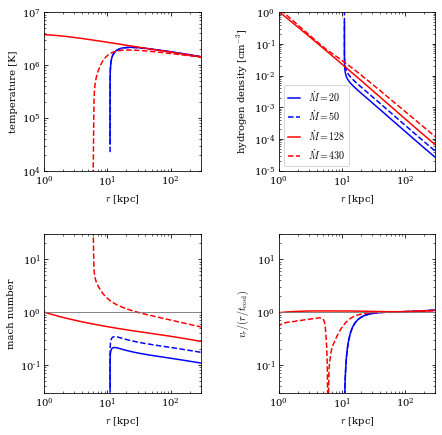

In [7]:
fig = pl.figure(figsize=(7,7))
pl.subplots_adjust(hspace=0.4,wspace=0.5)
for iPanel in range(4):
    pl.subplot(2,2,iPanel+1)
    for ires,res in enumerate(stalled_solutions+transsonic_solutions):
        c= 'br'[ires//2]
        ls = ('-','--')[ires%2]
        label = r'$\dot{M} = %d$'%res.Mdot.value
        if iPanel==0: ys = res.Ts()
        if iPanel==1: ys = res.nHs()
        if iPanel==2: ys = res.Ms()
        if iPanel==3: ys = res.t_cools() / res.t_flows()
        pl.loglog(res.Rs(),ys,c=c,ls=ls,label=label)
        pl.xlim(1,300)
        pl.xlabel(r'$r$ [kpc]')
        if iPanel==0:
            pl.ylabel(r'temperature [K]')
            pl.ylim(1e4,1e7)            
        if iPanel==1: 
            pl.ylabel(r'hydrogen density [cm$^{-3}$]')
            pl.ylim(1e-5,1)
            pl.legend(loc='lower left',fontsize=10,handlelength=1.2)
        if iPanel==2: 
            pl.ylabel(r'mach number')
            pl.ylim(0.03,30)
            pl.axhline(1.,c='.5',lw=0.5)
        if iPanel==3: 
            pl.ylabel(r'$v_r / (r/t_{\rm cool})$')
            pl.ylim(0.03,30)
            pl.axhline(1.,c='.5',lw=0.5)